# Calculer des dérivées avec Python


Nous allons voir ici trois manière de calculer des dérivées avec Python. Avec les outils suivants:
- Numpy
- Scipy
- Sympy

Et nous l'appliquerons à la fonction sigmoide, l'une des fonctions d'activation les plus utilisées dans les réseaux de neurones.

Mais avant tout, commencons par calculer la dérivée a la main


In [2]:
!pip install sympy

   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.3 MB ? eta -:--:--
   --- ------------------------------------ 0.5/6.3 MB 221.1 kB/s eta 0:00:27
   --- ------------------------------------ 0.5/6.3 MB 221.1 kB/s eta 0:00:27
   --- ------------------------------------ 0.5/6.3 MB 221.1 kB/s eta 0:00:27
   ---- ----------------------------------- 0.8/6.3 MB 276.9 kB/s eta 0:00:2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.differentiate import derivative
import sympy as sp

ModuleNotFoundError: No module named 'sympy'

## Méthode Manuelle
La fonction sigmoide est définie par la formule suivante:
$$f(x) = \frac{1}{1 + e^{-x}}$$

Traçons là:

In [ ]:
# Définir la fonction sigmoïde
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Définir la dérivée de la sigmoïde
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

In [ ]:
# On définit la plage de valeurs pour x
x = np.linspace(-8, 8, 400)

In [ ]:
# On calcule la valeur de la sigmoïde et de sa dérivée (en utilisant la forme analytique, car la dérivée est connue)
y = sigmoid(x)
dy = sigmoid_derivative(x)

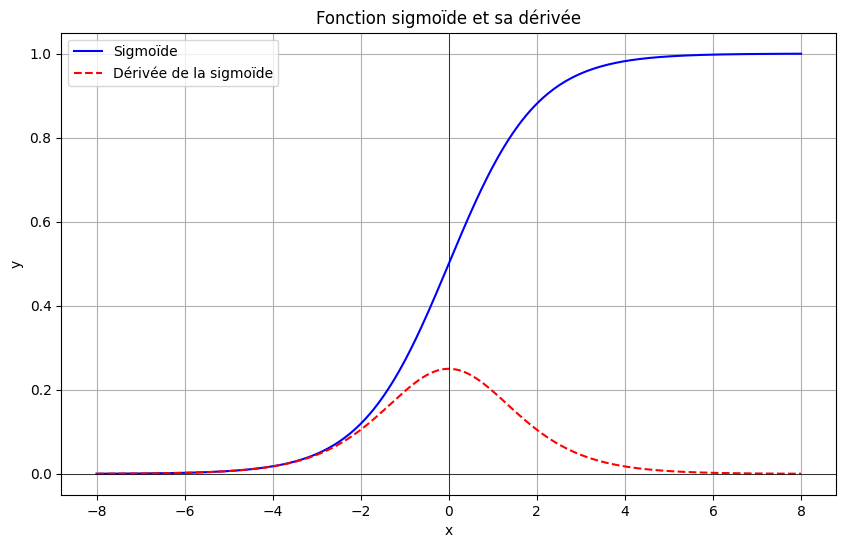

In [ ]:
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Sigmoïde', color='blue')
plt.plot(x, dy, label='Dérivée de la sigmoïde', color='red', linestyle='--')
plt.title("Fonction sigmoïde et sa dérivée")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

## Tracé de la tangente en un point

In [ ]:
t = 2  # abscisse du point de tangente
yt = sigmoid(t)  # Calul de la valeur de la sigmoïde en t (ordonnée)
slope = sigmoid_derivative(t)  # Calcul de la pente de la tangente

dx = 1.5  # Longueur du demi-segment
x_tangent = np.array([t - dx, t + dx])
y_tangent = yt + slope * (x_tangent - t)

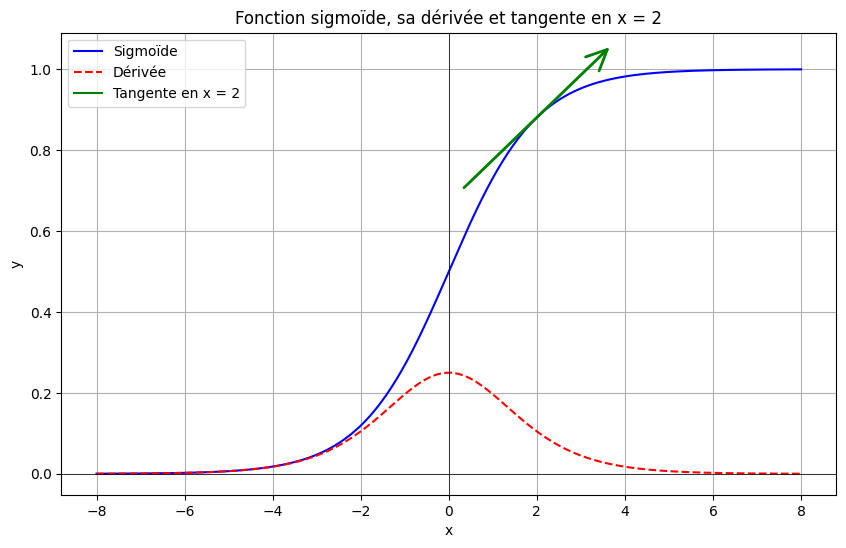

In [ ]:
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Sigmoïde', color='blue')
plt.plot(x, dy, label='Dérivée', color='red', linestyle='--')
plt.plot(x_tangent, y_tangent, label="Tangente en x = {}".format(t), color='green')

# Ajouter une flèche pour représenter la tangente
plt.annotate(
    "",
    xy=(t + 1.7, yt + slope * 1.7),
    xytext=(t - 1.7, yt - slope*1.7),
    arrowprops=dict(
        arrowstyle="->,head_length=1.5,head_width=0.7",
        color='green',
        lw=2
    )
)

plt.title("Fonction sigmoïde, sa dérivée et tangente en x = {}".format(t))
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

# Calculer les Dérivées avec Numpy, Scipy, ou Sympy

### Dérivée avec Numpy

On va utiliser la méthode `numpy.gradient` pour calculer la dérivée de la fonction sigmoide. Cette méthode calcule la dérivée numérique d'une fonction en utilisant la méthode des différences finies.

In [ ]:
# Définir la fonction sigmoïde
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
%matplotlib inline

# Domaine d'évaluation
x = np.linspace(-6, 6, 1000)
y = sigmoid(x)

# Dérivée numérique par gradient
dy_dx = np.gradient(y, x)

dy_dx[:10]

array([0.00248131, 0.00249623, 0.00252624, 0.00255661, 0.00258734,
       0.00261845, 0.00264992, 0.00268177, 0.002714  , 0.00274662])

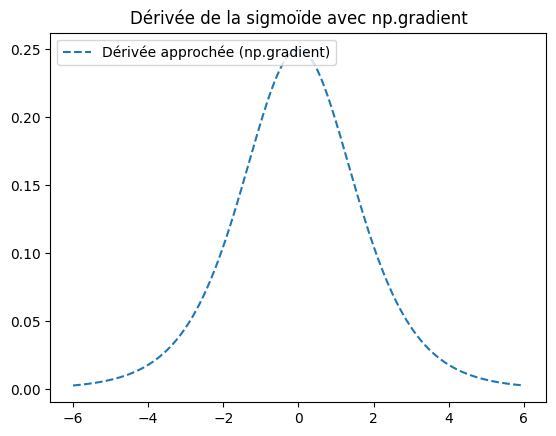

In [ ]:
plt.plot(x, dy_dx, label='Dérivée approchée (np.gradient)', linestyle='--')
plt.legend(loc='upper left')
plt.title('Dérivée de la sigmoïde avec np.gradient')
plt.show()

### Dérivée avec Scipy

On peut également calculer la dérivée en un point avec Scipy et la fonction `scipy.differentiate.derivative` (attention `scipy.misc.derivative` est obsolète depuis la version `1.12`).

In [ ]:
from scipy.differentiate import derivative

In [ ]:
x0 = 0 # le point ou calculer notre dérviée

derivative(sigmoid, x0) # la dérivée est donnée par df

     success: True
      status: 0
          df: 0.24999999999992006
       error: 1.9621637648015167e-11
         nit: 2
        nfev: 11
           x: 0.0

Si l'on désire calculer notre dérivée pour tout une fenetre de valeurs, il faut donc utiliser une boucle for.

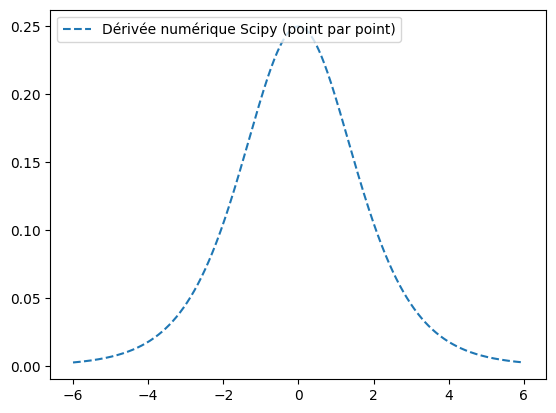

In [ ]:
%matplotlib inline

x = np.linspace(-6, 6, 1000)

d_sigmoid = [derivative(sigmoid, xi) for xi in x]

d_sigmoid = np.array([d['df'] for d in d_sigmoid])

plt.plot(x, d_sigmoid, label='Dérivée numérique Scipy (point par point)', linestyle='--')
plt.legend(loc='upper left')
plt.show()

### Dérivée avec Sympy

Sympy utilise la méthode de la dérivation symbolique. Cela signifie qu'il calcule la dérivée d'une fonction en utilisant les règles de la dérivation. C'est la méthode la plus précise, mais aussi la plus lente (dans l'industrie, nous ne l'utilisons pas)

la librairie repose sur le fait de définir nos expressions et nos variables en tant que symboles (exemple : sp.exp()) qui sont ensuite reconnu en tant que tels dans l'outil.

In [ ]:
x_sym = sp.symbols('x') # on définit un symbol x

sigmoid_sym = 1 / (1 + sp.exp(-x_sym)) # on définit notre fonction avec sympy

# Calcul formel de la dérivée
sigmoid_deriv_sym = sp.diff(sigmoid_sym, x_sym)  # calcul la dérivée

sigmoid_deriv_func = sp.lambdify(x_sym, sigmoid_deriv_sym, 'numpy') # transforme la dérivée en fonction qui revoit un tableau

# Pour appliquer sur tout un tableau
x = np.linspace(-6, 6, 1000)
d_sigmoid_sympy = sigmoid_deriv_func(x)

# Afficher la formule dérivée
print('Dérivée symbolique simplifiée :', sp.simplify(sigmoid_deriv_sym))

Dérivée symbolique simplifiée : 1/(4*cosh(x/2)**2)


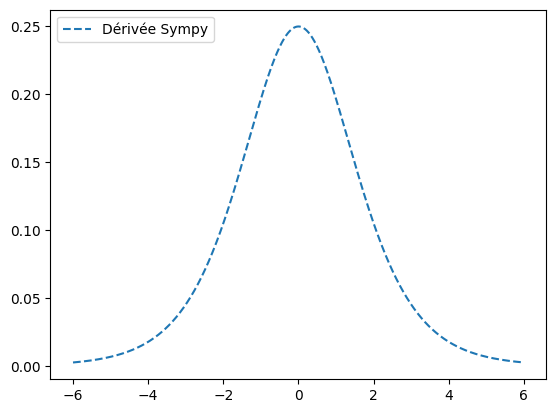

In [ ]:
%matplotlib inline

plt.plot(x, d_sigmoid_sympy, label='Dérivée Sympy', linestyle='--')

plt.legend(loc='upper left')
plt.show()